In [ ]:
!pip install gensim
import numpy as np
# Get the interactive Tools for Matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.decomposition import PCA
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

In [ ]:

!wget -P /content/gdrive/"Shared drives"/CISC6210NLPFall21/ExampleCode/WordV -c "http://storm.cis.fordham.edu/~yli/data/larger_files/glove.6B.50d.txt"
!ls /content/gdrive/"Shared drives"/CISC6210NLPFall21/ExampleCode/WordV
!pwd
glove_file_50 = datapath('/content/gdrive/Shared drives/CISC6210NLPFall21/ExampleCode/WordV/glove.6B.50d.txt')
# file name for converted word vectors
word2vec_glove_file = get_tmpfile('/content/gdrive/Shared drives/CISC6210NLPFall21/ExampleCode/WordV/glove.6B.50d.word2vec.txt')

#print(word2vec_glove_file)
glove2word2vec(glove_file_50, word2vec_glove_file)
!wget -P /content/gdrive/"Shared drives"/CISC6210NLPFall21/ExampleCode/WordV -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"
EMBEDDING_FILE = '/content/gdrive/Shared drives/CISC6210NLPFall21/ExampleCode/WordV/GoogleNews-vectors-negative300.bin.gz'


--2021-10-23 12:54:15--  http://storm.cis.fordham.edu/~yli/data/larger_files/glove.6B.50d.txt
Resolving storm.cis.fordham.edu (storm.cis.fordham.edu)... 150.108.68.26
Connecting to storm.cis.fordham.edu (storm.cis.fordham.edu)|150.108.68.26|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://storm.cis.fordham.edu/~yli/data/larger_files/glove.6B.50d.txt [following]
--2021-10-23 12:54:16--  https://storm.cis.fordham.edu/~yli/data/larger_files/glove.6B.50d.txt
Connecting to storm.cis.fordham.edu (storm.cis.fordham.edu)|150.108.68.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 171350079 (163M) [text/plain]
Saving to: ‘/content/gdrive/Shared drives/CISC6210NLPFall21/ExampleCode/WordV/glove.6B.50d.txt’

glove.6B.50d.txt    100%[===================>] 163.41M  15.4MB/s    in 12s     

2021-10-23 12:54:29 (13.7 MB/s) - ‘/content/gdrive/Shared drives/CISC6210NLPFall21/ExampleCode/WordV/glove.6B.50d.txt’ saved [171350079/

# **Tasks 3**

In [ ]:
model = KeyedVectors.load_word2vec_format(word2vec_glove_file)

In [ ]:
#a.  Find similar words for ‘computer’. 
model.most_similar('computer', topn=15)

[('computers', 0.9165046215057373),
 ('software', 0.8814994096755981),
 ('technology', 0.852556049823761),
 ('electronic', 0.812586784362793),
 ('internet', 0.8060455322265625),
 ('computing', 0.8026036024093628),
 ('devices', 0.8016185760498047),
 ('digital', 0.7991793155670166),
 ('applications', 0.7912740111351013),
 ('pc', 0.788316011428833),
 ('hardware', 0.7866967916488647),
 ('systems', 0.7800467014312744),
 ('web', 0.7793424725532532),
 ('laptop', 0.7741158604621887),
 ('desktop', 0.7662740349769592)]

In [ ]:
word2vec = KeyedVectors.load_word2vec_format(EMBEDDING_FILE, binary=True)
word2vec.most_similar('computer', topn=15)

[('computers', 0.7979379892349243),
 ('laptop', 0.6640493273735046),
 ('laptop_computer', 0.6548868417739868),
 ('Computer', 0.6473334431648254),
 ('com_puter', 0.6082079410552979),
 ('technician_Leonard_Luchko', 0.5662748217582703),
 ('mainframes_minicomputers', 0.5617721080780029),
 ('laptop_computers', 0.5585449934005737),
 ('PC', 0.5539618134498596),
 ('maker_Dell_DELL.O', 0.5519254207611084),
 ('laptops', 0.551753044128418),
 ('PCs', 0.5517113208770752),
 ('Computers', 0.5511513948440552),
 ('Los_Alamos_Natl', 0.5500181913375854),
 ('software', 0.5444108843803406)]

### #b. Find analogy pattern for “software”: “itunes” vs. “hardware” : ?

In [ ]:
def analogy1(x1, x2, y1):
    result = model.most_similar(positive=[y1, x2], negative=[x1], topn=1)
    return result


analogy1('software', 'itunes', 'hardware')




[('cd', 0.7440188527107239)]

In [ ]:
def analogy2(x1, x2, y1):
    result = word2vec.most_similar(positive=[y1, x2], negative=[x1], topn=1)
    return result
    
analogy2('software', 'itunes', 'hardware')


[('Itunes', 0.5544136762619019)]

# **task 4**

In [ ]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
nltk.download('stopwords')
e_stop=stopwords.words('english')

import pandas as pd
df = pd.read_excel(r'/content/CleanOutputLoveOutput.xlsx')
print(df)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
      Unnamed: 0  ...                                               Link
0           2084  ...   https://www.poetryfoundation.org/poems/52706/...
1             75  ...   https://www.poetryfoundation.org/poems/50717/...
2             74  ...   https://www.poetryfoundation.org/poems/44409/...
3           1964  ...   https://www.poetryfoundation.org/poetrymagazi...
4            210  ...   https://www.poetryfoundation.org/poetrymagazi...
...          ...  ...                                                ...
2035         296  ...   https://www.poetryfoundation.org/poetrymagazi...
2036         510  ...   https://www.poetryfoundation.org/poems/49691/...
2037        2004  ...   https://www.poetryfoundation.org/poems/147214...
2038        1143  ...   https://www.poetryfoundation.

In [ ]:
df["Author"].value_counts()
#William Shakespeare, John Donne, Edmund Spenser  are the top three

William Shakespeare        52
John Donne                 29
Edmund Spenser             23
Sir  Thomas Wyatt          19
Anonymous                  19
                           ..
Donald (Grady) Davidson     1
Peter Gizzi                 1
Andrew McMillan             1
Suzanne Gardinier           1
Edith Sdergran              1
Name: Author, Length: 957, dtype: int64

In [ ]:
e_stop

In [ ]:
list1=[]
list2=[]

import re
punctuation ="'!,;:?\、 ' ，；）.( " 
def removePunctuation(text):
    text = re.sub(r'[{}]+'.format(punctuation),' ',text)
    return text.strip()

for i in range(0, len(df)):
    if df.iloc[i]['Author']=='William Shakespeare' or df.iloc[i]['Author']=='John Donne'  or df.iloc[i]['Author']=='Edmund Spenser':        
        a=df.iloc[i]['Body']
        b=a.replace('[L]',' ').replace('[P]',' ')
        c=removePunctuation(b)
        tokenized_words=nltk.word_tokenize(c)
        tokens_lower = [t.lower() for t in tokenized_words]
        filtered_tokens_lower = [w for w in tokens_lower if not w in e_stop]
        list1.append(filtered_tokens_lower)
        for j in filtered_tokens_lower:
           list2.append(j)



        

In [ ]:
print(len(list1))
print(len(list2))

104
9805


In [ ]:
import gensim
model = gensim.models.Word2Vec(sentences = list1, min_count = 1)


In [ ]:
from collections import Counter
collection_words = Counter(list2)
most_counterNum = collection_words.most_common(20)
most_counterNum

[('love', 211),
 ('thou', 153),
 ('thy', 127),
 ('one', 82),
 ('thee', 78),
 ('doth', 71),
 ('shall', 66),
 ('yet', 62),
 ('like', 54),
 ('fair', 53),
 ('may', 51),
 ('let', 49),
 ('eyes', 45),
 ('make', 43),
 ('us', 40),
 ('time', 40),
 ('beauty', 39),
 ('true', 38),
 ('still', 37),
 ('hath', 35)]

In [ ]:
list3=[]
for i in most_counterNum:
  list3.append(i[0])
list3

['love',
 'thou',
 'thy',
 'one',
 'thee',
 'doth',
 'shall',
 'yet',
 'like',
 'fair',
 'may',
 'let',
 'eyes',
 'make',
 'us',
 'time',
 'beauty',
 'true',
 'still',
 'hath']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


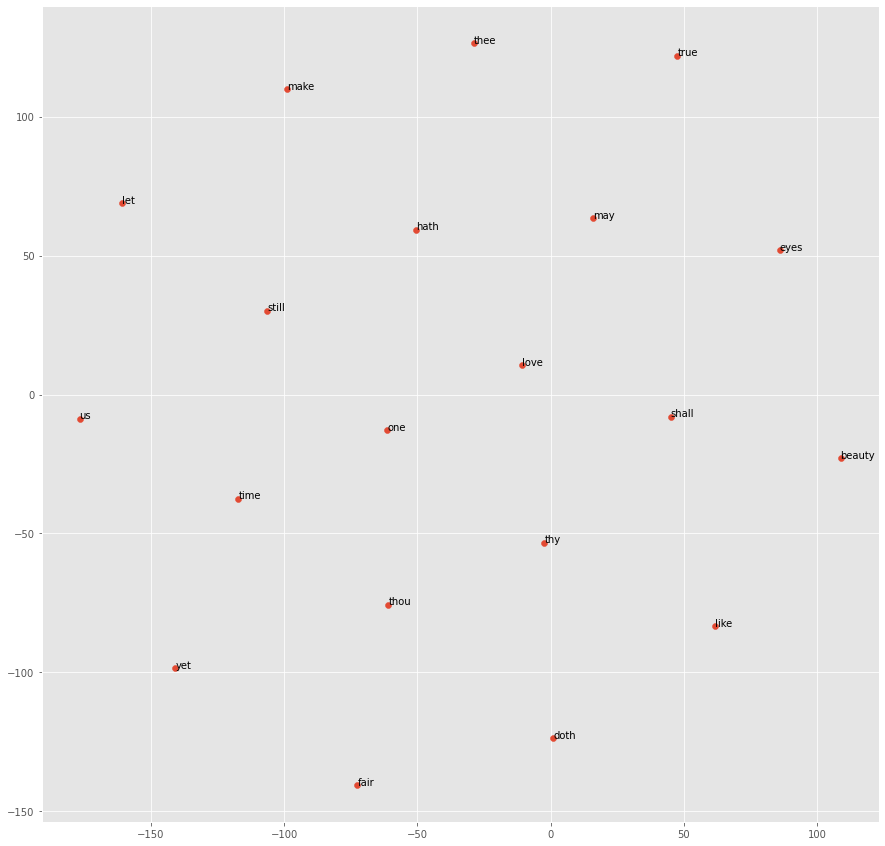

In [ ]:
import numpy as np
X = np.array([model[v] for v in list3])
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
Y = tsne.fit_transform(X)
plt.figure(figsize=(15,15))
plt.scatter(Y[:, 0], Y[:, 1])
for label, x, y in zip(list3, Y[:, 0], Y[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
plt.show()

In [ ]:
model.most_similar('love',topn=20)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('every', 0.5574496984481812),
 ('thy', 0.556679368019104),
 ('thou', 0.5506110191345215),
 ('death', 0.5062220096588135),
 ('sweet', 0.5055553317070007),
 ('let', 0.48305729031562805),
 ('shall', 0.4766172468662262),
 ('beauty', 0.4744277000427246),
 ('might', 0.470994234085083),
 ('light', 0.4646250605583191),
 ('fair', 0.44875195622444153),
 ('know', 0.44766727089881897),
 ('see', 0.44762754440307617),
 ('first', 0.4465799629688263),
 ('yet', 0.44527679681777954),
 ('thee', 0.4430762827396393),
 ('much', 0.4415009021759033),
 ('one', 0.4370952248573303),
 ('heart', 0.4360576272010803),
 ('thine', 0.42363327741622925)]

## **task 6:Perform step 4 & 5 for two versions of datasets, compare results.**

I don't remove stop words for task 6. Compared with task 4&5  the performance is bad. 

In [ ]:
list1=[]
list2=[]

import re
punctuation ="'!,;:?\、 ' ，；）.( " 
def removePunctuation(text):
    text = re.sub(r'[{}]+'.format(punctuation),' ',text)
    return text.strip()

for i in range(0, len(df)):
    if df.iloc[i]['Author']=='William Shakespeare' or df.iloc[i]['Author']=='John Donne'  or df.iloc[i]['Author']=='Edmund Spenser':        
        a=df.iloc[i]['Body']
        b=a.replace('[L]',' ').replace('[P]',' ')
        c=removePunctuation(b)
        tokenized_words=nltk.word_tokenize(c)
        tokens_lower = [t.lower() for t in tokenized_words]
        list1.append(tokens_lower)
        for j in tokens_lower:
           list2.append(j)



In [ ]:
print(len(list1))
print(len(list2))

104
18347


In [ ]:
import gensim
model = gensim.models.Word2Vec(sentences = list1, min_count = 1)

In [ ]:
from collections import Counter
collection_words = Counter(list2)
most_counterNum = collection_words.most_common(20)
most_counterNum

[('and', 599),
 ('the', 466),
 ('to', 407),
 ('that', 315),
 ('of', 307),
 ('in', 302),
 ('i', 253),
 ('my', 244),
 ('love', 211),
 ('a', 205),
 ('but', 189),
 ('is', 185),
 ('with', 177),
 ('her', 172),
 ('not', 172),
 ('which', 153),
 ('thou', 153),
 ('it', 152),
 ('be', 152),
 ('so', 144)]

In [ ]:
list3=[]
for i in most_counterNum:
  list3.append(i[0])
list3

['and',
 'the',
 'to',
 'that',
 'of',
 'in',
 'i',
 'my',
 'love',
 'a',
 'but',
 'is',
 'with',
 'her',
 'not',
 'which',
 'thou',
 'it',
 'be',
 'so']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


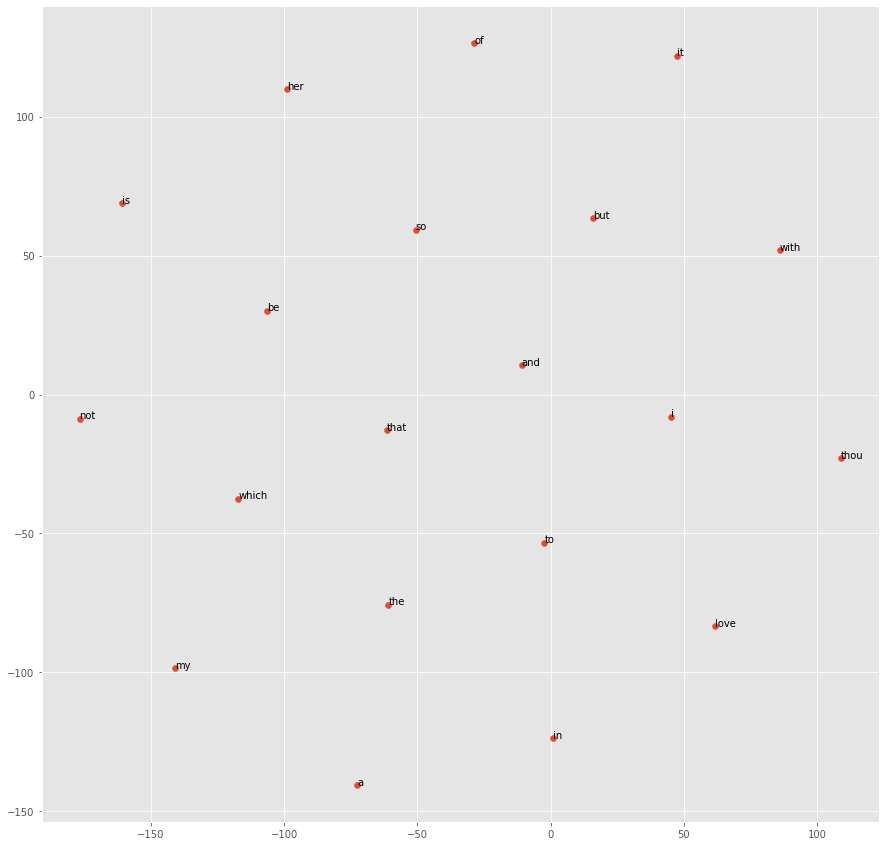

In [ ]:
import numpy as np
X = np.array([model[v] for v in list3])
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
Y = tsne.fit_transform(X)
plt.figure(figsize=(15,15))
plt.scatter(Y[:, 0], Y[:, 1])
for label, x, y in zip(list3, Y[:, 0], Y[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
plt.show()

In [ ]:
model.most_similar('love',topn=20)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('my', 0.9999077320098877),
 ('when', 0.9999005198478699),
 ('the', 0.9999004602432251),
 ('and', 0.9998952746391296),
 ('s', 0.9998931884765625),
 ('to', 0.9998922348022461),
 ('i', 0.9998854398727417),
 ('d', 0.9998834729194641),
 ('in', 0.9998816251754761),
 ('you', 0.9998811483383179),
 ('that', 0.9998762607574463),
 ('her', 0.9998756647109985),
 ('a', 0.999875545501709),
 ('me', 0.9998745918273926),
 ('or', 0.9998719096183777),
 ('of', 0.9998707175254822),
 ('on', 0.9998692870140076),
 ('this', 0.9998679757118225),
 ('with', 0.9998669624328613),
 ('which', 0.999862551689148)]